<a href="https://colab.research.google.com/github/zecakpm/NLP-product_reviews/blob/main/eda_reviews_amzn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import sklearn

Data set >> https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

Columns

* doRecommend: A true/false for whether or not the 
reviewer recommends the product.

* numHelpful: The number of people that found this review helpful.

* text: The full (or available) text of the review.



In [ ]:

#connecting with personal frive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#open file
df = open('/content/drive/My Drive/Colab Notebooks/NLP/eda_amzn/1429_1.csv')

In [ ]:
#csv to a dataframe
df = pd.read_csv(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#checking #rows and #columns
df.shape

(34660, 21)

In [ ]:
#selecting 4 columns out of 21
df = df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of the data", df.shape)
df.head()

Shape of the data (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


In [ ]:
#Checking for empty rows
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [ ]:
#Drop empty row
df.dropna(inplace=True)
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

In [ ]:
#Selecting products with 500+ reviews
#Print unique products
df = df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop=True)
print('Number of products', len(df['name'].unique()))

Number of products 8


In [ ]:
#Making selected columns as integers
df['reviews.doRecommend'] = df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful'] = df['reviews.numHelpful'].astype(int)

In [ ]:
df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\nEcho (White),,,',
       'Amazon Fire Tv,,,\nAmazon Fire Tv,,,'], dtype=object)

Section for text cleaning


In [ ]:
#func to remove extra commas
df['name']=df['name'].apply(lambda x: x.split(',,,')[0])

In [ ]:
#check a sample
for index, text in enumerate(df['reviews.text'][45:50]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 More flexibility than a Kindle and bigger screen. Like it because I can surf the web and download and read books.
Review 2:
 For the money you cannot beat this tablet. Full of features, picture quality is great, and very fast speed while using the internet.
Review 3:
 Easy to use, solid build, sharp HP screen for movies. Who needs more?
Review 4:
 Tablet is perfect for beginners who just want basic
Review 5:
 this is my first tablet .. love it .. actually read my first e-book on it .. large screen, easy to read & play games .. fits nicely in my purse


In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
#apply func to expand contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

df['reviews.text'] = df['reviews.text'].apply(lambda x:expand_contractions(x))

In [ ]:
#function to lower case all text from reviews
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

In [ ]:
#function to remove punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]'% re.escape(string.punctuation),'',x))

In [ ]:
#function to remove extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
df.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed my ch...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person bough...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd 8 two weeks now and i lo...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...


In [ ]:
#check a sample
for index, text in enumerate(df['cleaned'][45:50]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 more flexibility than a kindle and bigger screen like it because i can surf the web and download and read books
Review 2:
 for the money you cannot beat this tablet full of features picture quality is great and very fast speed while using the internet
Review 3:
 easy to use solid build sharp hp screen for movies who needs more
Review 4:
 tablet is perfect for beginners who just want basic
Review 5:
 this is my first tablet love it actually read my first ebook on it large screen easy to read play games fits nicely in my purse


In [ ]:
#import libraries
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])


In [ ]:
#create a lemmatized column from the reviews cleaned
%%time
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

CPU times: user 16min 50s, sys: 14.9 s, total: 17min 5s
Wall time: 17min 3s


In [ ]:
#save df
df.to_csv('/content/drive/My Drive/Colab Notebooks/NLP/eda_amzn/df_lema.csv',index=False)

In [ ]:
#open file
df_lem = open('/content/drive/My Drive/Colab Notebooks/NLP/eda_amzn/df_lema.csv')

In [ ]:
#csv to a dataframe
df_lem = pd.read_csv(df_lem)

In [ ]:
df_lem.shape


(26068, 6)

In [ ]:
#adding string as type
df = df_lem[['name','lemmatized']].copy()
df['lemmatized'] = df['lemmatized'].astype(str)
df.head()

,name,lemmatized
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great beginner experience person buy gift love
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",inexpensive tablet use learn step nabi thrill ...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",fire hd 8 week love tablet great valuewe prime...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",buy grand daughter come visit set user enter a...


In [ ]:
#grouping all words per product
df_grouped = df.groupby('name')['lemmatized'].apply(lambda x: ' '.join(x)).reset_index()
df_grouped.head(10)

,name,lemmatized
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",product far disappoint child love use like abi...
1,Amazon Fire Tv,echo learn everyday use daily use place speake...
2,Amazon Kindle Paperwhite - eBook reader - 4 GB...,nice little set slow wish investigate little j...
3,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,good value money hand work perfectly purchase ...
4,Echo (White),compete ipad high end android tablet easily ou...
5,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",tablet light stream use stream movie ligh ipad...
6,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",sale people nice knowledgeable come great prod...
7,"Kindle Voyage E-reader, 6 High-Resolution Disp...",well original kindle lighter easy read old kin...


In [ ]:
#document matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')

In [ ]:
#creating a document matrix
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(),columns=cv.get_feature_names())
df_dtm.index = df_grouped['name']
df_dtm.head(10)

,01052016,01162017,062017,0ff,0ne,10,100,1000,10000,1000s,100150,1005,1008,100s,100this,100x,101,1010,1012,1015,1024,1024x600,105,10700,1080,1080p,1087,10and,10k,10month,10th,10x,10year,10yearold,10yr,10yrold,11,110,110at,112,...,yougo,youit,youkathleen,younameit,young,younger,youngest,youngin,youngster,yourbedmate,youreyesprobably,yous,youse,youshe,youso,youth,youtube,youtubeand,youtubegmail,youtubekid,youtubenetflix,youtubepandora,youversion,youwhat,yr,yrold,yrs,yup,z3,zeepad,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,1,0,0,0,39,26,1,1,0,0,0,0,0,1,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,7,0,0,1,...,0,0,0,0,20,0,0,0,0,0,1,0,0,0,0,1,37,0,0,0,0,0,0,0,23,0,3,0,0,0,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,0,0,0,0,4,11,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,1,0,0,18,13,1,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,15,0,0,0,2,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,10,0,5,0,0,0,0,4,0,0,0,0,2,0,2,0
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,0,0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Echo (White),1,0,0,1,0,26,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,1,12,0,0,1,1,0,0,0,0,1,0,1,11,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,3
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",0,0,0,0,0,9,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,52,0,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,36,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",0,0,0,0,1,126,38,6,1,0,0,0,1,0,0,0,5,2,0,1,4,1,0,1,1,1,1,0,1,0,0,1,0,1,3,1,43,1,0,0,...,1,0,0,0,181,1,1,0,2,0,0,1,1,0,1,4,137,1,1,1,0,1,1,0,108,1,20,1,1,2,0,5,0,0,0,1,2,1,5,0
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,",0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
#select all numeric columns
col_rm = [i for i in df_dtm.columns if i.isdigit()]

In [ ]:
#remove all numeric columns
df_dtm.drop(col_rm, inplace=True, axis=1)

In [ ]:
df_dtm.head()

,0ff,0ne,1000s,100s,100this,100x,1024x600,1080p,10and,10k,10month,10th,10x,10year,10yearold,10yr,10yrold,110at,11yearold,1200page,128gbi,12hr,12th,12yearold,12yr,13rd,13th,13yrs,14pound,14yo,14yr,1520x,15inability,15min,15mins,15yr,16gbthank,16th,16yr,17th,...,yougo,youit,youkathleen,younameit,young,younger,youngest,youngin,youngster,yourbedmate,youreyesprobably,yous,youse,youshe,youso,youth,youtube,youtubeand,youtubegmail,youtubekid,youtubenetflix,youtubepandora,youversion,youwhat,yr,yrold,yrs,yup,z3,zeepad,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,20,0,0,0,0,0,1,0,0,0,0,1,37,0,0,0,0,0,0,0,23,0,3,0,0,0,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,15,0,0,0,2,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,10,0,5,0,0,0,0,4,0,0,0,0,2,0,2,0
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Echo (White),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,12,0,0,1,1,0,0,0,0,1,0,1,11,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,3


In [ ]:
#libraries
from wordcloud import WordCloud
from textwrap import wrap

In [ ]:
#function for word cloud
def w_cloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150, colormap='Dark2').generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title('\n'.join(wrap(title,60)), fontsize=13)
  plt.show()

In [ ]:
#transpose 
df_dtm=df_dtm.transpose()

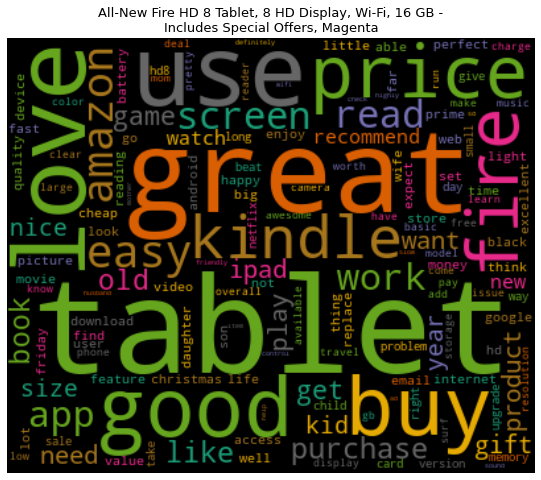

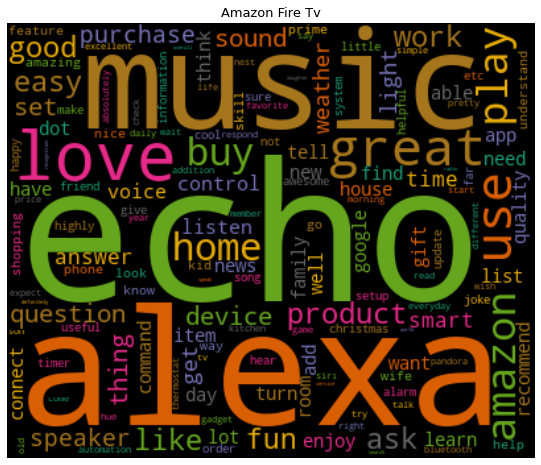

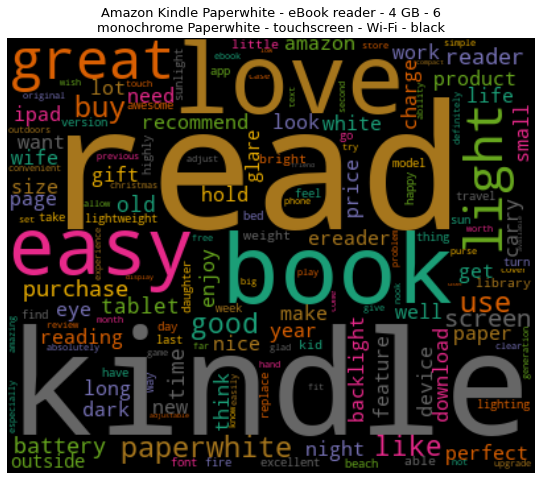

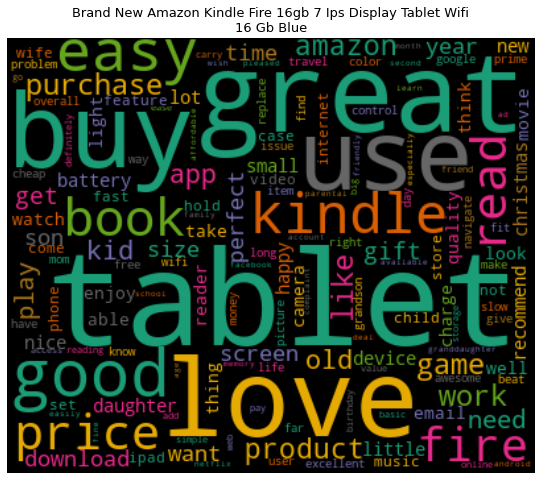

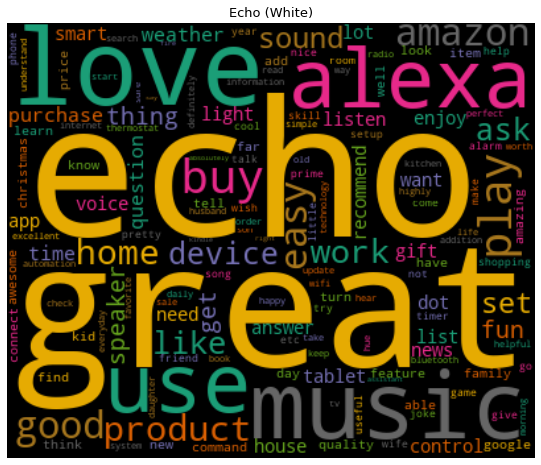

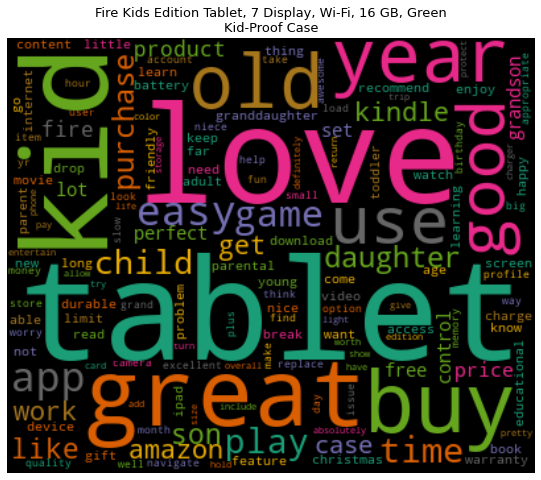

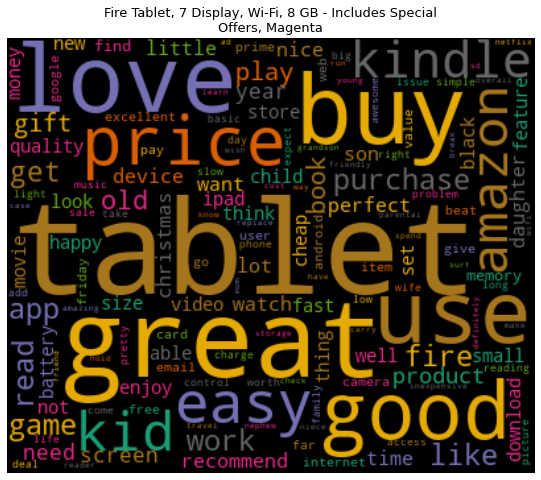

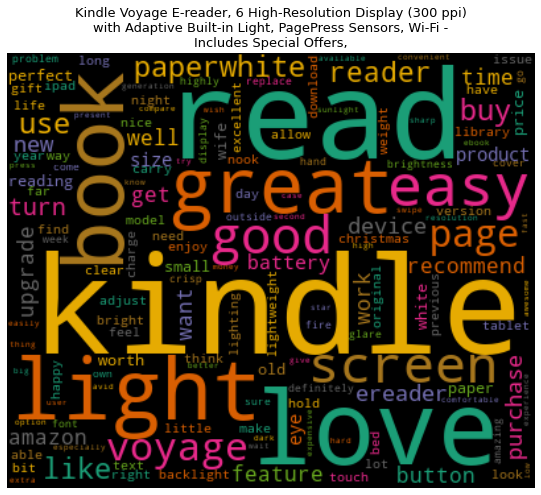

In [ ]:
#word cloud per product
for index,product in enumerate(df_dtm.columns):
  w_cloud(df_dtm[product].sort_values(ascending=False), product)

In [ ]:
#calculationg sentment polarity
from textblob import TextBlob
df_lem['polarity']=df_lem['lemmatized'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
print("3 random reviews with highest polarity")
for index, review in enumerate(df_lem.iloc[df_lem['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 random reviews with highest polarity
Review 1:
 This product is very impressive. Used every day ty
Review 2:
 Excellent product!!! Excellent product!!! Excellent product!!! A+A+A+
Review 3:
 Perfect for watching Netflix, surfing web, checking email, and reading kindle books.


In [ ]:
print("3 random revies with lowest polarity")
for index, review in enumerate(df_lem.iloc[df_lem['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 random revies with lowest polarity
Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 2:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 3:
 Too proprietary, the apps my daughter liked I could not install on it for her so basically it was worthless for me and I returned it.


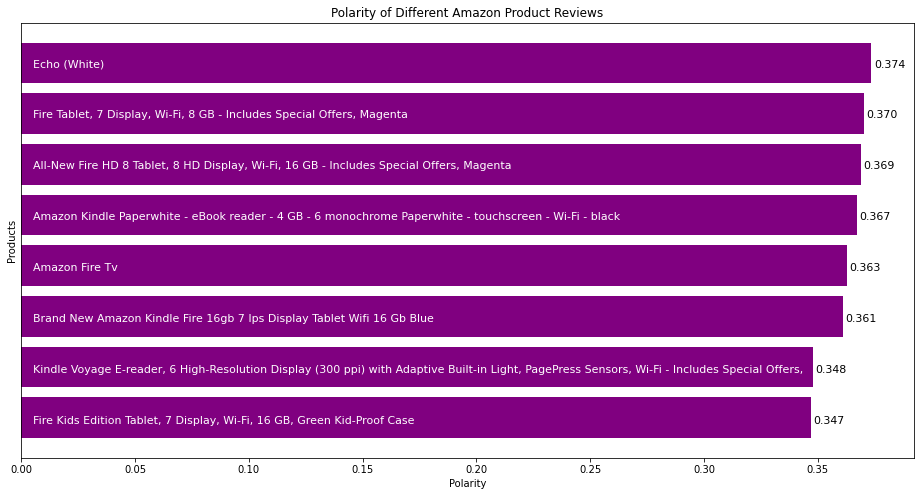

In [ ]:
#ploting sentiment polarity
product_polarity_sorted = pd.DataFrame(df_lem.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)), product_polarity_sorted['polarity'], color='purple',)

for bar, product in zip(polarity_graph, product_polarity_sorted.index):
  plt.text(0.005, bar.get_y()+bar.get_width(),'{}'.format(product),va='center', fontsize=11, color='white')

for bar, polarity in zip(polarity_graph, product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001, bar.get_y()+bar.get_width(),'%.3f'%polarity, va='center', fontsize=11, color='black')
           

plt.yticks([])
plt.show()

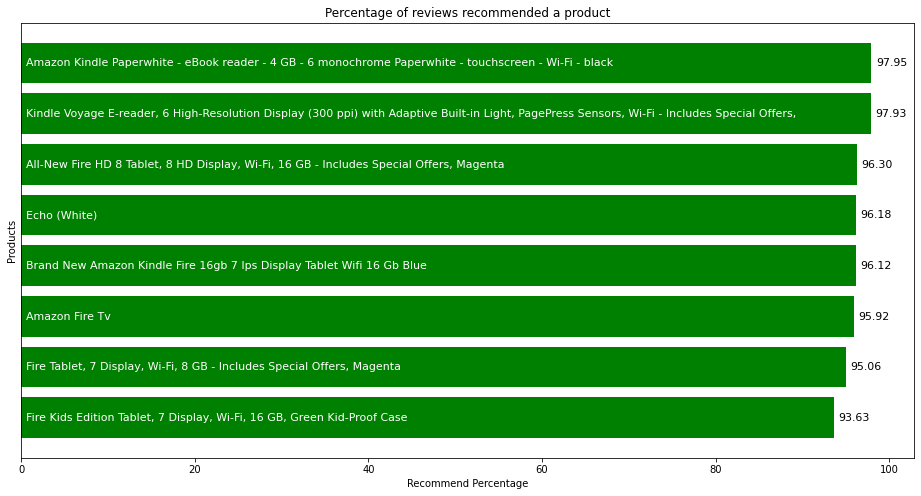

In [ ]:
#ploting recommendation percetange by product
recommend_percentage = pd.DataFrame(((df_lem.groupby('name')['reviews.doRecommend'].sum()*100)/df_lem.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviews recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)), recommend_percentage['reviews.doRecommend'], color='green')

for bar, product in zip(recommend_graph, recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product), va='center', fontsize=11, color='white')

for bar, percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

In [ ]:
!pip install textstat

     |████████████████████████████████| 102kB 3.3MB/s 
     |████████████████████████████████| 1.9MB 20.5MB/s 


In [ ]:
#redeability function

import textstat

df_lem['dale_chall_score']=df_lem['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df_lem['flesh_reading_ease']=df_lem['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df_lem['gunning_fog']=df_lem['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

In [ ]:
print('Dale Chall Score of upvolted reviews =>', df_lem[df_lem['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews =>', df_lem[df_lem['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesh Reading Score of upvolted reviews =>', df_lem[df_lem['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesh Reading Score of not upvoted reviews =>', df_lem[df_lem['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvolted reviews =>', df_lem[df_lem['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning For Index of not upvoted reviews =>', df_lem[df_lem['reviews.numHelpful']<=1]['gunning_fog'].mean())

Dale Chall Score of upvolted reviews => 6.148739837398377
Dale Chall Score of not upvoted reviews => 5.695477993940365
Flesh Reading Score of upvolted reviews => 81.98257113821124
Flesh Reading Score of not upvoted reviews => 84.8586581087524
Gunning Fog Index of upvolted reviews => 7.980264227642276
Gunning For Index of not upvoted reviews => 6.8617784244936715


In [ ]:
#redeability function
df_lem['text_standard']=df_lem['reviews.text'].apply(lambda x: textstat.text_standard(x))

In [ ]:
print('Text Standard of upvolted reviews =>', df_lem[df_lem['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvolted reviews =>', df_lem[df_lem['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvolted reviews => 0    5th and 6th grade
dtype: object
Text Standard of not upvolted reviews => 0    5th and 6th grade
dtype: object


In [ ]:
#reading time function
df_lem['reading_time']=df_lem['reviews.text'].apply(lambda x: textstat.reading_time(x))

In [ ]:
print('Reading Time of upvoted reviews =>', df_lem[df_lem['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews =>', df_lem[df_lem['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews => 3.4542174796747958
Reading Time of not upvoted reviews => 1.7917397544251397
